# **Astrophysical Computations & Algorithms**
## *TA Week 11*

## HW13
<img src='HW13.png' width='600'>

### **Do not use any library realted to FFT**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = 2+3j
print(x)
print(x.real)
print(x.imag)

(2+3j)
2.0
3.0


In [14]:
a = np.arange(5); b=np.arange(5)*2j
c = a+b

In [15]:
print(a.dtype, b.dtype, c.dtype)
print(c)
print(c.real)
print(c.imag)

int64 complex128 complex128
[0.+0.j 1.+2.j 2.+4.j 3.+6.j 4.+8.j]
[0. 1. 2. 3. 4.]
[0. 2. 4. 6. 8.]


In [16]:
print(np.abs(c))
print(np.sqrt(c.real**2+c.imag**2))

[0.         2.23606798 4.47213595 6.70820393 8.94427191]
[0.         2.23606798 4.47213595 6.70820393 8.94427191]


In [17]:
conj_c = np.conj(c)
print(conj_c)

[0.-0.j 1.-2.j 2.-4.j 3.-6.j 4.-8.j]


### **How to implement FT?**
$H_{n} \;=\; \sum_{k=0}^{N-1} h_{k}\,e^{-2\pi i \,k n / N}$

### `1. 이중 for-loop`

N개의 $H_k$ 를 계산하기 위한 for loop와 $\Sigma$를 계산하기 위한 for loop 가 필요

### `2.벡터화 vectorization`

### *Hint*
- 식을 행렬곱으로 표현해보기. 

- exponential term을 어떻게 array(matrix)로 구현할 것인가? -> `np.meshgrid()`, `numpy broadcasting`

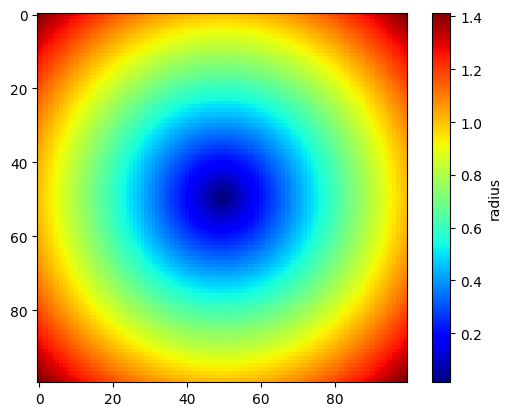

In [18]:
#Example of np.meshgrid()
X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
r = np.sqrt(X**2+Y**2)
plt.imshow(r, cmap='jet')
plt.colorbar(label='radius')
plt.show()

In [19]:
# Example of numpy broadcasting
a = np.array([1, 2, 3, 4])
b = np.array([[10],[20],[30]])

In [20]:
print(a+b)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]


In [21]:
print(a*b)

[[ 10  20  30  40]
 [ 20  40  60  80]
 [ 30  60  90 120]]


## HW14
<img src='HW14.png' width='600'>

### **Do not use any library realted to FFT**

```bash
pip install wavio
conda install wavio
```
https://pypi.org/project/wavio/

In [22]:
import wavio

In [23]:
wav = wavio.read('Do262.wav')
data = wav.data
rate = wav.rate

In [24]:
print(data.shape) # (N_data, N_channel)
print(rate)  # sampling rate 44100Hz

(52992, 1)
44100


In [25]:
# (52992,1) -> (52992,)
sound = data.flatten()
print(sound.shape)

# Otherwise,
print(data[:,0].shape)

(52992,)
(52992,)


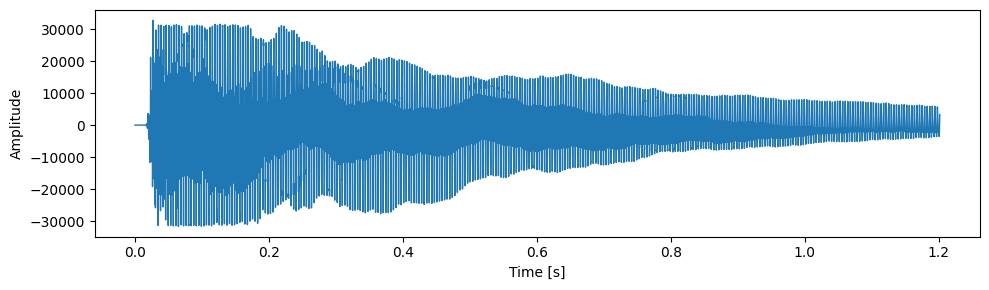

In [26]:
t = np.arange(len(sound)) / rate
plt.figure(figsize=(10, 3))
plt.plot(t, sound, linewidth=1)
# plt.xlim()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [29]:
X = np.fft.fft(sound)
power = np.abs(X)**2
freqs = np.fft.fftfreq(len(sound))*rate
print(freqs)

[ 0.          0.83220109  1.66440217 ... -2.49660326 -1.66440217
 -0.83220109]


Text(0, 0.5, 'Power')

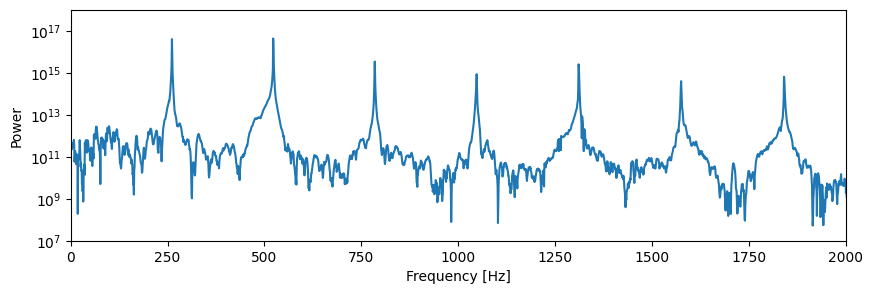

In [40]:
plt.figure(figsize=(10,3))
plt.plot(freqs, power)
plt.xlim(0,2000)
plt.ylim(1e7,1e18)
plt.yscale('log')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power")
#plt.vlines((np.arange(7)+1)*262, ymin=1e7,ymax=1e18, colors='red', linestyle='dashed')


### For Fun! Challenge to perfect pitch!
`scipy.signal.find_peaks`

---